# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs2/20250228_sparc4acs2_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs2/20250228_s4c2_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs2/20250228_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs2/20250228_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs2/20250228_s4c2_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:36.962000,0.00001,0,0,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,0,None,None,False
1,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:38.082073,0.00001,0,0,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,0,None,None,False
2,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:39.202146,0.00001,0,0,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,0,None,None,False
3,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:40.322218,0.00001,0,0,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,0,None,None,False
4,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:41.442291,0.00001,0,0,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,0,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:01:58.308000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L4,None,True
1549,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:03:40.710000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,2,L4,None,True
1550,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:05:23.115000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,3,L4,None,True
1551,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:07:05.715000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,4,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs2/20250228_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   102R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   102R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   102R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   102R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   102R x 13C   [I11, D2

Then we plot the science frame using the `sparc4.product_plots` library

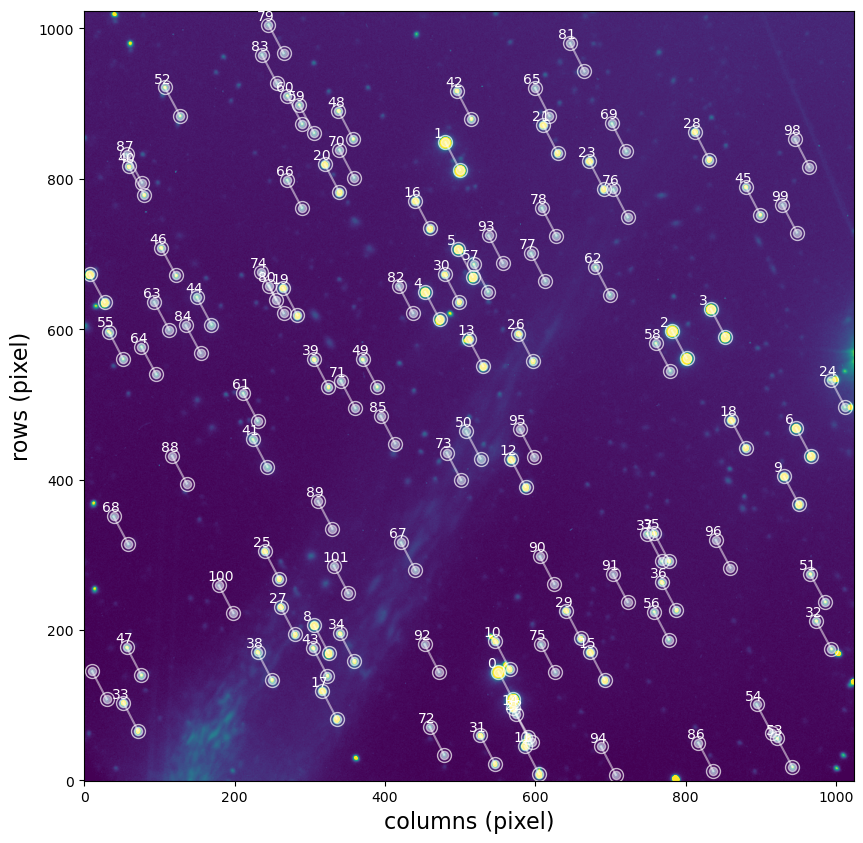

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553079,-38.759735,570.237125,107.611485,5.539004,5.539004,-11.644707,0.000552,-9.588035,0.000486,10,0
1,1,189.564752,-38.693898,499.809290,811.430774,5.448598,5.448598,-11.251097,0.000687,-9.627362,0.000520,10,0
2,2,189.527393,-38.716370,801.047762,561.392915,5.545266,5.545266,-11.118394,0.000743,-9.624454,0.000582,10,0
3,3,189.521324,-38.713476,852.688453,590.234099,5.486448,5.486448,-10.507651,0.001064,-9.627809,0.000519,10,0
4,4,189.567108,-38.712657,472.612378,613.097362,5.513897,5.513897,-10.079997,0.001449,-9.619179,0.000784,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,189.618072,-38.761558,29.984012,107.922995,5.535456,5.535456,-5.841503,0.046841,-9.584406,0.000616,10,0
98,98,189.508935,-38.691882,964.360802,815.482395,5.142923,5.142923,-5.585506,0.058896,-9.639085,0.000495,10,0
99,99,189.510528,-38.700118,947.865790,728.548934,5.120534,5.120534,-5.681592,0.053520,-9.634463,0.000471,10,0
100,100,189.598309,-38.750258,198.424651,222.391403,5.291489,5.291489,-5.456744,0.067963,-9.588171,0.000683,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

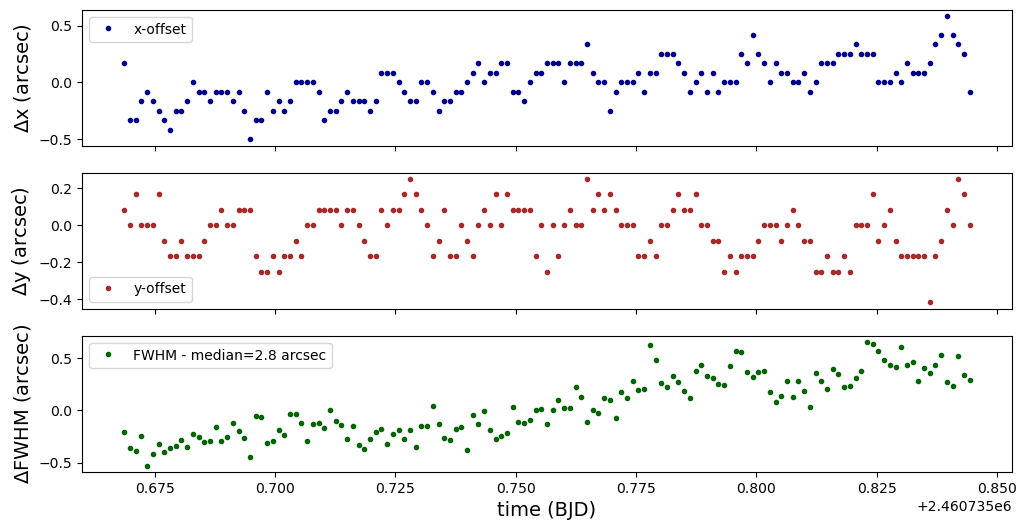

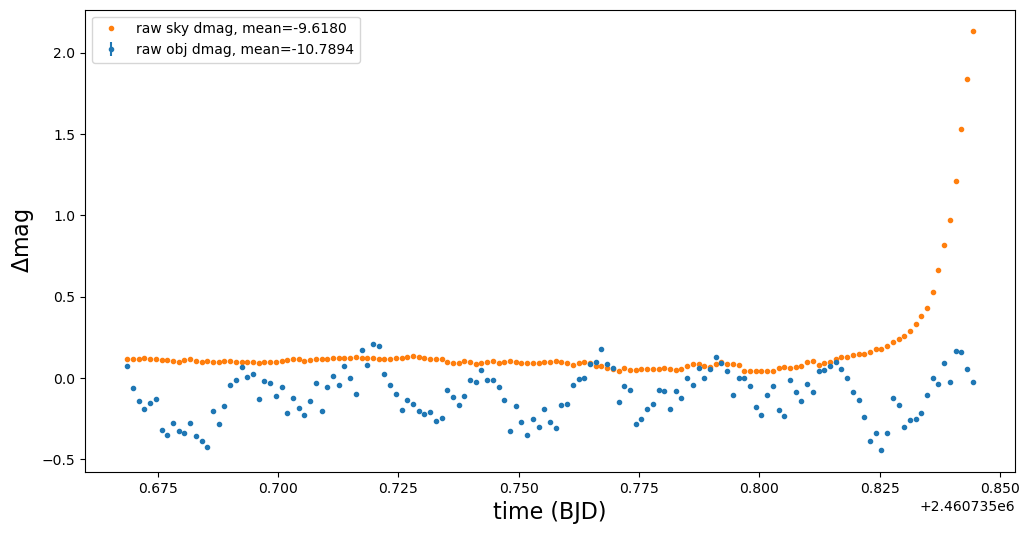

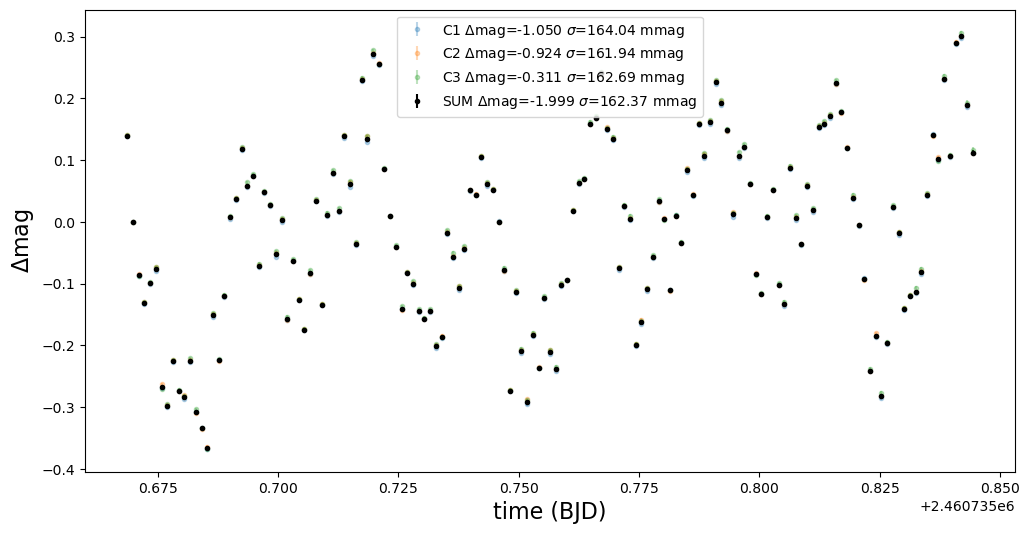

       TIME                x          ...       diffmagsum      
------------------ ------------------ ... ----------------------
2460735.6686872947 463.00993025633306 ...    0.13978182470545342
2460735.6698728777 461.50993025633306 ... -0.0005153659526015986
2460735.6710604625 461.50993025633306 ...   -0.08657482147084572
2460735.6722443667 462.00993025633306 ...   -0.13158867339145353
 2460735.673428734 462.25993025633306 ...   -0.09965142248410608
 2460735.674614084 462.00993025633306 ...    -0.0759871640835339
2460735.6757996315 461.75993025633306 ...    -0.2676038422054692
               ...                ... ...                    ...
 2460735.837198356 463.50993025633306 ...    0.10148324351154692
2460735.8383853263 463.75993025633306 ...    0.23157113278217878
2460735.8395729093 464.25993025633306 ...    0.10637819179663843
2460735.8407581896 463.75993025633306 ...    0.28940211037317987
2460735.8419435043 463.50993025633306 ...    0.30032092458784376
 2460735.843131076 463.25

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=4
comps=[1,2,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs2/20250228_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     921   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   1274   102R x 631C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D,

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0146', 'EFE0146', 'FO0147', 'EFO0147', 'FE0147', 'EFE0147', 'FO0148',
       'EFO0148', 'FE0148', 'EFE0148'],
      dtype='object', length=631)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 00:51:56,205 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 00:51:56,205 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 00:51:56,218 root - INFO - Source index: i=4   [pipeline_lib]


2025-09-18 00:51:56,218 | INFO | Source index: i=4 


2025-09-18 00:51:56,218 root - INFO - Source RA=189.5671079853747 Dec=-38.71265686552338 mag=-16.2501+-0.0002  [pipeline_lib]


2025-09-18 00:51:56,218 | INFO | Source RA=189.5671079853747 Dec=-38.71265686552338 mag=-16.2501+-0.0002


2025-09-18 00:51:56,219 root - INFO - Best aperture radius: 12.0 pixels  [pipeline_lib]


2025-09-18 00:51:56,219 | INFO | Best aperture radius: 12.0 pixels


2025-09-18 00:51:56,220 root - INFO - Polarization in Q: -0.0033+-0.0003  [pipeline_lib]


2025-09-18 00:51:56,220 | INFO | Polarization in Q: -0.0033+-0.0003


2025-09-18 00:51:56,221 root - INFO - Polarization in U: -0.0020+-0.0005  [pipeline_lib]


2025-09-18 00:51:56,221 | INFO | Polarization in U: -0.0020+-0.0005


2025-09-18 00:51:56,222 root - INFO - Polarization in V: 0.0003+-0.0003  [pipeline_lib]


2025-09-18 00:51:56,222 | INFO | Polarization in V: 0.0003+-0.0003


2025-09-18 00:51:56,223 root - INFO - Total linear polarization p: 0.0039+-0.0004  [pipeline_lib]


2025-09-18 00:51:56,223 | INFO | Total linear polarization p: 0.0039+-0.0004


2025-09-18 00:51:56,224 root - INFO - Angle of polarization theta: 106+-3 deg  [pipeline_lib]


2025-09-18 00:51:56,224 | INFO | Angle of polarization theta: 106+-3 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 00:51:56,225 root - INFO - Free constant k: 1.2142001036576713+-0.0  [pipeline_lib]


2025-09-18 00:51:56,225 | INFO | Free constant k: 1.2142001036576713+-0.0


2025-09-18 00:51:56,226 root - INFO - Zero of polarization: 27.2+-0.0  [pipeline_lib]


2025-09-18 00:51:56,226 | INFO | Zero of polarization: 27.2+-0.0


2025-09-18 00:51:56,227 root - INFO - RMS of zi residuals: 0.0022194533846381986  [pipeline_lib]


2025-09-18 00:51:56,227 | INFO | RMS of zi residuals: 0.0022194533846381986


2025-09-18 00:51:56,227 root - INFO - Reduced chi-square (n=149.0, DOF=146.0): 1.42  [pipeline_lib]


2025-09-18 00:51:56,227 | INFO | Reduced chi-square (n=149.0, DOF=146.0): 1.42


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 00:51:56,309 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:51:56,309 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:51:56,313 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:51:56,313 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:51:56,530 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:51:56,530 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:51:56,535 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:51:56,535 | INFO | Substituting symbol \perp from STIXGeneral


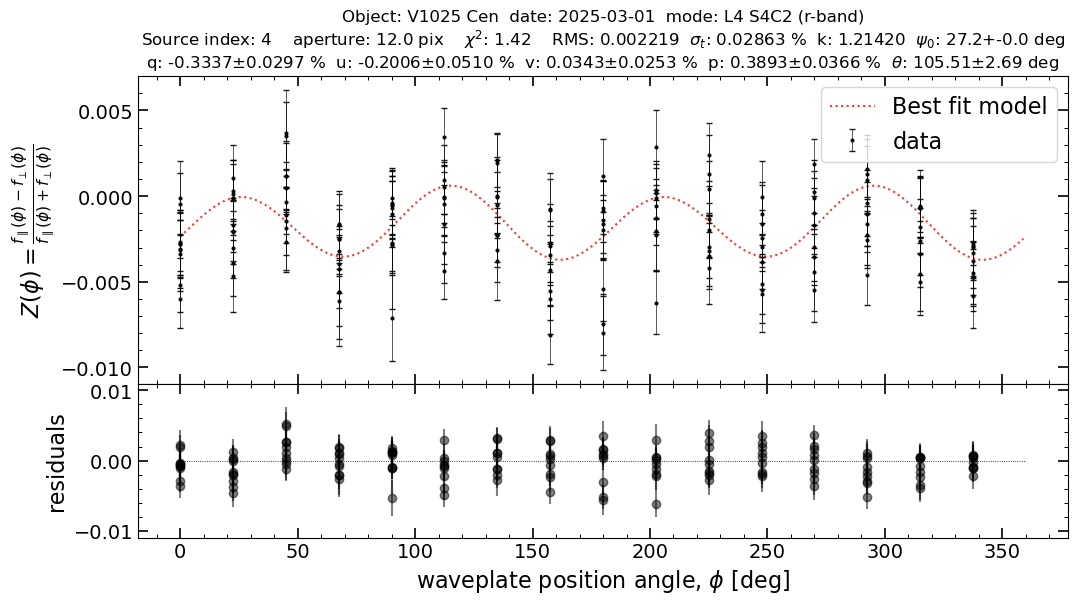

In [11]:
source_index = 4

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs2/20250228_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 4
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 4
APERTURE_RADIUS : 12.0
NEXPS : 149
MAG : -16.2501+-0.0002
RA : 189.5671079853747
DEC : -38.71265686552338
FWHM : 5.994224646465462
X1 : 453.4074821376318
Y1 : 649.724613423071
X2 : 472.61237837503427
Y2 : 613.097361539947
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  20

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.39+-0.04 %  Angle of polarization: 106+-3 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

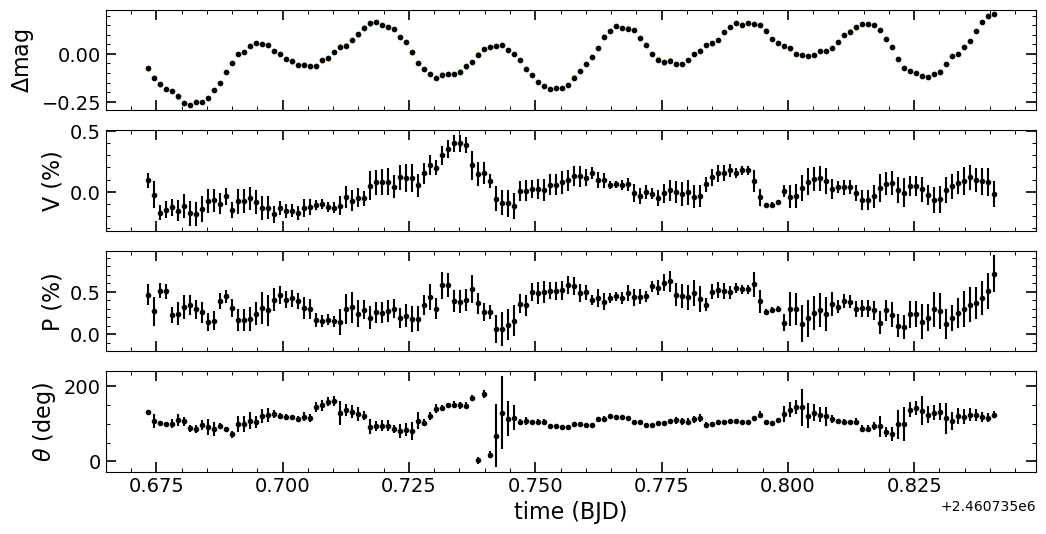

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.07575834260820447,0.0006816835320964487,-0.07463981750714765,0.0006924063477407466,-0.07696349050820928,0.0007777484451517929,2460735.673416972,453.4074821376318,649.724613423071,472.61237837503427,613.097361539947,5.20563943011937,-12.994821001861688,0.0006333560186069357,-15.0882575734616,0.0005878708134805756,-0.07566403204954586,0.004650651358855515,0.0012193011465890754,130.4503984852377,7.498307248090353
-0.12487254178192497,0.000704776292041509,-0.1235171005580753,0.0007150170034740939,-0.1258302176959294,0.0007974790883103339,2460735.6746028727,451.9074821376318,649.474613423071,471.11237837503427,612.847361539947,5.20563943011937,-12.946994211083114,0.000658258437538069,-15.089404838918863,0.0005865316032431265,-0.12463808828538259,0.0026912572484121353,0.001726586678081096,106.6792676608481,18.348442543816347
-0.15994853072511095,0.0007207701424273487,-0.15849513370874746,0.0007307109266369498,-0.16057853248091192,0.0008117624672677406,2460735.675789983,451.9074821376318,649.974613423071,471.11237837503427,613.347361539947,5.208111973965041,-12.913111749720116,0.0006755124491001891,-15.090492850429534,0.0005860504697702865,-0.1596085611590512,0.0051137043609780775,0.0008736791543709478,102.77668005422534,4.886325460205115
-0.18500824396101923,0.0007340407388633361,-0.1831823451148793,0.0007437564054316386,-0.18510969374845843,0.0008237564260864152,2460735.676974628,452.4074821376318,649.474613423071,471.61237837503427,612.847361539947,5.264318172162685,-12.887948610029074,0.0006895673325238487,-15.090139687686904,0.0005865617854907696,-0.18441853810746256,0.005025171433070271,0.0009108251055362534,98.4111233553589,5.183822754166441
-0.19701516319695234,0.0007393172590590527,-0.19520588590399157,0.0007488866407914407,-0.19685879747409096,0.0008284559559637264,2460735.6781605696,452.6574821376318,649.474613423071,471.86237837503427,612.847361539947,5.254929725855037,-12.877131069894403,0.0006953173553857364,-15.09128082648793,0.0005859708245027282,-0.19637721704315947,0.002237076182550522,0.0009344104800894747,99.61945024591142,11.946012361586368
-0.2235740014155274,0.000752884899458276,-0.2223129696261168,0.0007621374506637177,-0.2233269471874184,0.0008406039790720062,2460735.6793470946,452.4074821376318,649.474613423071,471.61237837503427,612.847361539947,5.272546943649216,-12.850455511450736,0.0007095790755032572,-15.091348370170877,0.0005863418985472617,-0.22312031916977393,0.0024275390373991812,0.0013905316552364144,109.58270552397629,16.382519385710648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.00043233123013397545,0.0007766467210576607,0.0010249485606941278,0.000791220067608841,0.0007853421824535189,0.0009009022513939258,2460735.833624922,453.1574821376318,649.224613423071,472.36237837503427,612.597361539947,6.899813213625244,-12.983570943246496,0.000718925142766384,-15.0006831926229,0.0007001957644674823,0.0006602901739638511,0.0024987209782274112,0.0018074607933259643,121.50880183666771,20.68793560367584
0.03515749927269862,0.0007765515215214596,0.035385592395703824,0.0007919660559112059,0.03584046745168834,0.0009074596640093472,2460735.8348114756,452.9074821376318,648.974613423071,472.11237837503427,612.347361539947,6.905002433560591,-13.019287634788235,0.0007161620776644091,-15.001740478744006,0.0007176776272415027,0.03531969559459558,0.0029525705104863835,0.002102274986037602,119.03284686169175,20.3636337852507


In [16]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=4, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)